# Amazon Product Reviews to Ratings Sentiment Analysis

This notebook contains code for snetiment analysis of Amazon product reviews. We are trying to map review text to review ratings. 

#### 1: **Data Preprocessing**
    1.1: Data Loading
    1.2: Data Cleaning
    
#### 2: **Different Model training and testing and visualisations**
    2.1: train and test data 
    2.2: Count_Vectorizer and MLP classifier
    2.3: Word2vec and MLP classifer
    2.4: Gated-recurrent-network model and deault embedding
    2.5: Tensorflow and word2vec embeddings
    2.6: LSTM






In [104]:
pwd

'/home/honey/Desktop/Vidyashilp-Assignment/Task2'

### 1. **Data Preprocessing**

##### 1.1 **Data Loading**

In [105]:
#making all the required imports here
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix
import string as st
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

import tensorflow as tf


import matplotlib.pyplot as plt 



%matplotlib inline



In [106]:
#Loading the data into dataframe using pandas
df = pd.read_csv('Data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
reviews = df['reviews.text']
ratings = df['reviews.rating']

print("reviews shape = ", reviews.shape)
print("ratings shape = ", ratings.shape)


reviews shape =  (5000,)
ratings shape =  (5000,)


<AxesSubplot:>

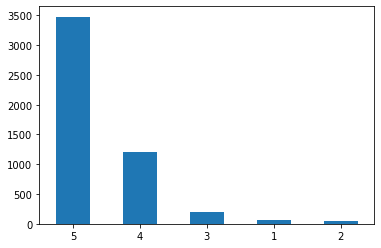

In [107]:
#class imbalance detection
df['reviews.rating'].value_counts().plot(kind="bar", rot=0)

##### 1.2 : **Data Cleaning**

In [108]:
#function to remove punctuations
def remove_punc(text):
    words = [w for w in text if w not in st.punctuation]
    return ''.join(words)

#function to remove stopwords
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    words=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(words)
#function to lematize the words
def lematize(text):
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in text]
    return words
    

reviews = reviews.apply(remove_punc)
reviews = reviews.apply(remove_stopword)
#reviews = reviews.apply(lematize)

print("Reviews length after cleaning = ", reviews.shape)
print("sample : ", reviews[0:2])







Reviews length after cleaning =  (5000,)
sample :  0    I thought would big small paper turn like palm...
1          This kindle light easy use especially beach
Name: reviews.text, dtype: object


#### **2 Different Model Testing and Training**

##### **2.1: Train and Test data**

In [126]:
X_train, X_test, y_train, y_test = train_test_split(reviews, ratings, test_size=0.25 )
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)
print("Y_train shape = ", y_train.shape)
print("Y_test shape = ", y_test.shape)

X_train shape =  (3750,)
X_test shape =  (1250,)
Y_train shape =  (3750,)
Y_test shape =  (1250,)


##### **2.2: Count_Vectorizer, TF-id and MLP classifier**

In [110]:
#Count vectorizer to get vectors of reviews based on counts/freq/bag-of-words
Count_vectr = CountVectorizer(ngram_range=(2,2),min_df=1)
Count_vectr.fit(X_train)
Count_vectr_xtrain = Count_vectr.transform(X_train)
Count_vectr_x_test = Count_vectr.transform(X_test)
print("count vectr train shape = ",Count_vectr_xtrain.shape )
print("count vectr test shape = ",Count_vectr_x_test.shape )
print("y train shape = ",y_train.shape )
print("y test shape = ",y_test.shape )

#Tf-id vectorizer to get numerical representtion of reviews based on TF-id algorithm
tf_id_vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
tf_id_vectr.fit(X_train)
tf_id_vect_X_train = tf_id_vectr.transform(X_train)
tf_id_vect_X_test = tf_id_vectr.transform(X_test)
print("tfid vectr train shape = ",tf_id_vect_X_train.shape )
print("tfid vectr test shape = ",tf_id_vect_X_test.shape )

count vectr train shape =  (3750, 36762)
count vectr test shape =  (1250, 36762)
y train shape =  (3750,)
y test shape =  (1250,)
tfid vectr train shape =  (3750, 42033)
tfid vectr test shape =  (1250, 42033)


confusion matrix for architecture 1 with count vectorizer


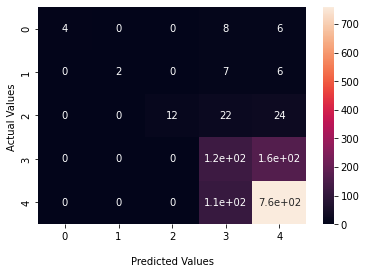

classification report = 
              precision    recall  f1-score   support

           1       1.00      0.22      0.36        18
           2       1.00      0.13      0.24        15
           3       1.00      0.21      0.34        58
           4       0.45      0.43      0.44       288
           5       0.79      0.87      0.83       871

    accuracy                           0.72      1250
   macro avg       0.85      0.37      0.44      1250
weighted avg       0.73      0.72      0.70      1250



In [111]:
#MLP model with three hidden layer and 8 neurins each
count_vectr_mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20000, alpha = 0.001)
count_vectr_mlp.fit(Count_vectr_xtrain,y_train)
score = count_vectr_mlp.score(Count_vectr_x_test, y_test)*100
y_predicted = count_vectr_mlp.predict(Count_vectr_x_test)
cf_matrix = confusion_matrix(y_test, y_predicted)
print("MLP architecture 1 with count vectorizer score = ",score )

#plot the confusion matrix
print("confusion matrix for architecture 1 with count vectorizer")
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

print("classification report = ", )
print(classification_report(y_test,y_predicted))


MLP architecture 2 with count vectorizer score =  0.7408
confusion matrix for architecture 2 with ctf-id vectorizer


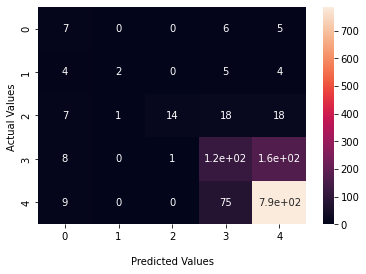

classification report = 
              precision    recall  f1-score   support

           1       0.20      0.39      0.26        18
           2       0.67      0.13      0.22        15
           3       0.93      0.24      0.38        58
           4       0.53      0.40      0.46       288
           5       0.81      0.90      0.85       871

    accuracy                           0.74      1250
   macro avg       0.63      0.41      0.44      1250
weighted avg       0.74      0.74      0.72      1250



In [113]:
tf_id_vectr_mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=20000, alpha = 0.001)
tf_id_vectr_mlp.fit(tf_id_vect_X_train, y_train)

score = tf_id_vectr_mlp.score(tf_id_vect_X_test, y_test)
y_predicted = tf_id_vectr_mlp.predict(tf_id_vect_X_test)
cf_matrix = confusion_matrix(y_test, y_predicted)
print("MLP architecture 2 with count vectorizer score = ",score )

#plot the confusion matrix
print("confusion matrix for architecture 2 with ctf-id vectorizer")
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

print("classification report = ", )
print(classification_report(y_test,y_predicted))

##### **2.3: Word2vec and MLP classifer**

In [114]:
#training and generating word2vec on trainng data
from gensim.models import Word2Vec
model = Word2Vec(X_train, min_count=1,vector_size= 150,workers=3, window =3, sg = 1)

In [115]:
# helper function to get the average
def getAvg(words, model, num_features):
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    index2word_set = set(model.wv.index_to_key)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    featureVec = np.divide(featureVec, nwords)
    return featureVec

# function ot get the vectors for for words in each reviewa nd take avg of it
def getFeaturesVectors(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = getAvg(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [116]:
trainDataVecs = getFeaturesVectors(X_train, model, 150)
testDataVecs =  getFeaturesVectors(X_test, model, 150)

print("trainDataVecs shape = ", trainDataVecs.shape)
print("testdatavecs shape = ", testDataVecs.shape)

trainDataVecs shape =  (3750, 150)
testdatavecs shape =  (1250, 150)


MLP architecture 3 with wrod2vec score =  0.7408
confusion matrix for architecture 3 with word2vec vectorizer


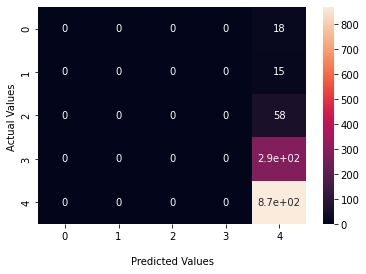

classification report = 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00       288
           5       0.70      1.00      0.82       871

    accuracy                           0.70      1250
   macro avg       0.14      0.20      0.16      1250
weighted avg       0.49      0.70      0.57      1250



/home/honey/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/honey/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/honey/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
word2vec_mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=20000, alpha = 0.001)
word2vec_mlp.fit(trainDataVecs,y_train)

y_predicted = word2vec_mlp.predict(testDataVecs)
cf_matrix = confusion_matrix(y_test, y_predicted)
score = word2vec_mlp.score(tf_id_vect_X_test, y_test)
print("MLP architecture 3 with wrod2vec score = ",score )

#plot the confusion matrix
print("confusion matrix for architecture 3 with word2vec vectorizer")
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

print("classification report = ", )
print(classification_report(y_test,y_predicted))

**Here we see that because class imbalance problem word2vec model predicts only label 5**

#### **2.4: GRU and deault embedding**

In [118]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
#total_reviews = X_train + X_test
tokenizer_obj.fit_on_texts(reviews) 

# pad sequences
max_length = 100 # try other options like mean
# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens =  tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)


X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')


y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [119]:
#GRU model with default embedding
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Build model...
Summary of the built model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          610300    
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                12864     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 623,329
Trainable params: 623,329
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
tf.config.run_functions_eagerly(True)

print('Training GRU model with deafault embeddings')

model.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Training GRU model with deafault embeddings


/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/25


/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


30/30 - 25s - loss: 0.5458 - accuracy: 0.6597 - val_loss: 0.3494 - val_accuracy: 0.6968
Epoch 2/25
30/30 - 23s - loss: 0.3040 - accuracy: 0.6952 - val_loss: 0.2986 - val_accuracy: 0.6968
Epoch 3/25
30/30 - 25s - loss: 0.2923 - accuracy: 0.6952 - val_loss: 0.2980 - val_accuracy: 0.6968
Epoch 4/25
30/30 - 22s - loss: 0.2914 - accuracy: 0.6952 - val_loss: 0.2972 - val_accuracy: 0.6968
Epoch 5/25
30/30 - 21s - loss: 0.2910 - accuracy: 0.6952 - val_loss: 0.2971 - val_accuracy: 0.6968
Epoch 6/25
30/30 - 23s - loss: 0.2911 - accuracy: 0.6952 - val_loss: 0.2970 - val_accuracy: 0.6968
Epoch 7/25
30/30 - 22s - loss: 0.2900 - accuracy: 0.6952 - val_loss: 0.2969 - val_accuracy: 0.6968
Epoch 8/25
30/30 - 22s - loss: 0.2899 - accuracy: 0.6952 - val_loss: 0.2968 - val_accuracy: 0.6968
Epoch 9/25
30/30 - 22s - loss: 0.2886 - accuracy: 0.6952 - val_loss: 0.2954 - val_accuracy: 0.6968
Epoch 10/25
30/30 - 22s - loss: 0.2860 - accuracy: 0.6955 - val_loss: 0.2926 - val_accuracy: 0.6968
Epoch 11/25
30/30 - 

#### **2.5: GRU and word2vec embedding**

In [127]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(reviews)
sequences = tokenizer_obj.texts_to_sequences(reviews)

# pad sequences
word_index = tokenizer_obj.word_index
print("unique-words  = ",len(word_index))
max_length = 100
review_pad = pad_sequences(sequences, maxlen=max_length)
sentiment =  df['reviews.rating'].values
print('Shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(review_pad, df['reviews.rating'])

unique-words  =  6102
Shape of review tensor: (5000, 100)
Shape of sentiment tensor: (5000,)


In [128]:
#train word2vec on newly padded and processed x-train and store the model
from gensim.models import Word2Vec
model_word2vec = Word2Vec(X_train, min_count=1,vector_size= 100,workers=3, window =3, sg = 1)


In [129]:
filename = 'embedding_word2vec.txt'
model_word2vec.wv.save_word2vec_format(filename, binary=False)

In [130]:
#creating embedding index for later use
import os
embeddings_index = {}
f = open(os.path.join('', 'embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()



In [134]:
#creating the embedding layer

EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

#choose only those words present in the embeddings
for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [135]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

# define model
model2 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model2.add(embedding_layer)
model2.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(5, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model2.summary())

Summary of the built model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          610300    
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                12864     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 623,329
Trainable params: 13,029
Non-trainable params: 610,300
_________________________________________________________________
None


In [136]:
print('Trainining with model3 = GRU with word2vec embeddings')

model3.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Trainining with model3 = GRU with word2vec embeddings
Epoch 1/25


/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


30/30 - 16s - loss: 0.6052 - accuracy: 0.6704 - val_loss: 0.3430 - val_accuracy: 0.6952
Epoch 2/25
30/30 - 15s - loss: 0.3171 - accuracy: 0.6957 - val_loss: 0.2929 - val_accuracy: 0.6952
Epoch 3/25
30/30 - 15s - loss: 0.2976 - accuracy: 0.6957 - val_loss: 0.2875 - val_accuracy: 0.6952
Epoch 4/25
30/30 - 15s - loss: 0.2955 - accuracy: 0.6957 - val_loss: 0.2864 - val_accuracy: 0.6952
Epoch 5/25
30/30 - 17s - loss: 0.2950 - accuracy: 0.6957 - val_loss: 0.2859 - val_accuracy: 0.6952
Epoch 6/25
30/30 - 15s - loss: 0.2950 - accuracy: 0.6957 - val_loss: 0.2858 - val_accuracy: 0.6952
Epoch 7/25
30/30 - 15s - loss: 0.2950 - accuracy: 0.6957 - val_loss: 0.2856 - val_accuracy: 0.6952
Epoch 8/25
30/30 - 15s - loss: 0.2949 - accuracy: 0.6957 - val_loss: 0.2856 - val_accuracy: 0.6952
Epoch 9/25
30/30 - 15s - loss: 0.2948 - accuracy: 0.6957 - val_loss: 0.2858 - val_accuracy: 0.6952
Epoch 10/25
30/30 - 15s - loss: 0.2948 - accuracy: 0.6957 - val_loss: 0.2855 - val_accuracy: 0.6952
Epoch 11/25
30/30 - 

#### **2.6: LSTM**

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

# define model
model3 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3.add(embedding_layer)
model3.add(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(5, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3.summary())

Summary of the built model...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          610300    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 627,489
Trainable params: 17,189
Non-trainable params: 610,300
_________________________________________________________________
None


In [138]:
print('Trainining LSTM model')

model3.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Trainining LSTM model
Epoch 1/25


/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/honey/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


30/30 - 15s - loss: 0.5839 - accuracy: 0.6744 - val_loss: 0.3545 - val_accuracy: 0.6952
Epoch 2/25
30/30 - 15s - loss: 0.3210 - accuracy: 0.6957 - val_loss: 0.2918 - val_accuracy: 0.6952
Epoch 3/25
30/30 - 15s - loss: 0.2964 - accuracy: 0.6957 - val_loss: 0.2864 - val_accuracy: 0.6952
Epoch 4/25
30/30 - 15s - loss: 0.2953 - accuracy: 0.6957 - val_loss: 0.2859 - val_accuracy: 0.6952
Epoch 5/25
30/30 - 15s - loss: 0.2950 - accuracy: 0.6957 - val_loss: 0.2858 - val_accuracy: 0.6952
Epoch 6/25
30/30 - 15s - loss: 0.2948 - accuracy: 0.6957 - val_loss: 0.2854 - val_accuracy: 0.6952
Epoch 7/25
30/30 - 15s - loss: 0.2951 - accuracy: 0.6957 - val_loss: 0.2856 - val_accuracy: 0.6952
Epoch 8/25
30/30 - 15s - loss: 0.2948 - accuracy: 0.6957 - val_loss: 0.2857 - val_accuracy: 0.6952
Epoch 9/25
30/30 - 15s - loss: 0.2949 - accuracy: 0.6957 - val_loss: 0.2855 - val_accuracy: 0.6952
Epoch 10/25
30/30 - 15s - loss: 0.2945 - accuracy: 0.6957 - val_loss: 0.2855 - val_accuracy: 0.6952
Epoch 11/25
30/30 - 